In [11]:
import random
import numpy as np
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations

# K-means from scratch

We are going to implement the K-means algorithm from scratch, and test it on the classic Fisher's Iris  dataset.

K-means Algorithm Summary:
- Initialize your k cluster centroids (randomly select k different observations)
- Compute the distance between each point and every centroid
- Assign each data point to the centroid closest to it
- Move the cluster centroid to the center (mean) of all the points assigned to it
- Repeat until you reach stopping criteria (either convergence or maximum iterations)
- Typically k-means is performed on scaled data.


## Implementation

You should implement k-means using either a functional or object-oriented approach. An object-oriented implementation might have a KMeans class with a "fit" method, and a functional implementation might have a "k_means" function that takes the data and numer of clusters as arguments and returns the centroids and assignemnts.

Load the dataset with sklearn.datasets.load_iris(), but since we will be hand coding our Kmeans in numpy we only need to get the features into an array. Create a numpy array of the features of the iris dataset. Do not use the labels for the clustering.

In [12]:
iris = datasets.load_iris()
X = iris.data

Using Numpy, initialize your cluster centers by selecting random data points. We will try our algorithm with multiple different k but let us start with 10. Pick at random 10 of our initial points. (Hint: try using http://docs.python.org/2/library/random.html#random.sample  )

For each one of your data points, compute the Euclidean distance between it and every centroid. Assign the point to the closest centroid.

Update each centroid by moving it to the center of all the points assigned to it. (E.g. make it the average of all the points in the cluster.)

Repeat steps 3 and 4 until convergence or max_iter is reached. If no cluster assignments change between iterations, then the algorithm has converged.

In [13]:
clusters = defaultdict(list)

In [145]:
def k_means(X, k=5, max_iter=1000):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in random.sample(list(X), k)]
    print(centers)
    for i in range(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [euclidean(datapoint, center) for center in centers]
            print(distances)
            center = centers[np.argmin(distances)]
            print(center)
            clusters[center].append(datapoint)

        
        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters, centers

In [146]:
clus, cent_ = k_means(X, k=5, max_iter=1000)

[(6.1, 3.0, 4.9, 1.8), (6.3, 2.3, 4.4, 1.3), (7.1, 3.0, 5.9, 2.1), (6.3, 2.5, 5.0, 1.9), (5.6, 2.5, 3.9, 1.1)]
[4.007492981902776, 3.618010503025109, 5.301886456724625, 4.27668095606862, 2.882707061079915]
(5.6, 2.5, 3.9, 1.1)
[4.0311288741492755, 3.5580893749314395, 5.357238094391549, 4.249705872175156, 2.792848008753788]
(5.6, 2.5, 3.9, 1.1)
[4.1856899072912706, 3.766961640367473, 5.529014378711635, 4.430575583375144, 2.9782545223670858]
(5.6, 2.5, 3.9, 1.1)
[4.047221268969613, 3.6262928728937496, 5.406477596365309, 4.288356328478313, 2.8160255680657444]
(5.6, 2.5, 3.9, 1.1)
[4.047221268969613, 3.686461718233353, 5.350700888668698, 4.330127018922194, 2.9376861643136762]
(5.6, 2.5, 3.9, 1.1)
[3.6742346141747673, 3.3867388443752198, 4.922397789695587, 3.9887341350358256, 2.7073972741361767]
(5.6, 2.5, 3.9, 1.1)
[4.112177038990418, 3.754996671103718, 5.468089245796927, 4.384062043356595, 2.9495762407505253]
(5.6, 2.5, 3.9, 1.1)
[3.9357337308308855, 3.538361202590827, 5.24785670536077, 4

(6.314285714285715, 2.9250000000000003, 5.360714285714285, 2.0428571428571423)
[4.2145927442636735, 0.6435413026086709, 1.4625163526035025, 0.5756318622316924, 1.6814358633322906]
(6.314285714285715, 2.9250000000000003, 5.360714285714285, 2.0428571428571423)
[4.409987755085042, 0.7415252483075352, 1.7889613335847214, 0.2603470995515358, 1.2662845503677296]
(6.314285714285715, 2.9250000000000003, 5.360714285714285, 2.0428571428571423)
[4.598390153086187, 1.1948710544383836, 2.0614723785069105, 0.5534907775350251, 1.3733086188107912]
(6.314285714285715, 2.9250000000000003, 5.360714285714285, 2.0428571428571423)
[4.076222761331868, 0.6885821724117349, 1.375690921029895, 0.5515516146957319, 1.791919798009946]
(6.314285714285715, 2.9250000000000003, 5.360714285714285, 2.0428571428571423)
[0.146942165493775, 3.802923026226105, 2.9238594497055863, 4.617752540529298, 5.676989896566163]
(5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999)
[0.43816891719974876, 3.825208954214229, 2

In [16]:
cent_

[(5.265384615384615, 3.68076923076923, 1.5038461538461538, 0.2923076923076923),
 (4.7250000000000005,
  3.1333333333333333,
  1.4208333333333334,
  0.19166666666666676),
 (6.293617021276596,
  2.8999999999999995,
  4.951063829787233,
  1.7297872340425529),
 (5.579999999999998,
  2.6333333333333337,
  3.986666666666667,
  1.2333333333333334),
 (7.086956521739132, 3.1260869565217386, 6.013043478260869, 2.143478260869565)]

In [17]:
clus

defaultdict(list,
            {(5.265384615384615,
              3.68076923076923,
              1.5038461538461538,
              0.2923076923076923): [array([5.1, 3.5, 1.4, 0.2]),
              array([5. , 3.6, 1.4, 0.2]),
              array([5.4, 3.9, 1.7, 0.4]),
              array([5.4, 3.7, 1.5, 0.2]),
              array([5.8, 4. , 1.2, 0.2]),
              array([5.7, 4.4, 1.5, 0.4]),
              array([5.4, 3.9, 1.3, 0.4]),
              array([5.1, 3.5, 1.4, 0.3]),
              array([5.7, 3.8, 1.7, 0.3]),
              array([5.1, 3.8, 1.5, 0.3]),
              array([5.4, 3.4, 1.7, 0.2]),
              array([5.1, 3.7, 1.5, 0.4]),
              array([5.1, 3.3, 1.7, 0.5]),
              array([5. , 3.4, 1.6, 0.4]),
              array([5.2, 3.5, 1.5, 0.2]),
              array([5.2, 3.4, 1.4, 0.2]),
              array([5.4, 3.4, 1.5, 0.4]),
              array([5.2, 4.1, 1.5, 0.1]),
              array([5.5, 4.2, 1.4, 0.2]),
              array([5.5, 3.5, 1.3, 0.2]),
 

## Part 2: Selecting k

Often it is tough to pick an ideal k in advance. We can force k in our case if we want a predetermined number of sections/topics. But it is most likely better to vary k and let the algorithm tell us what it wants. We can do choose an optimal k using the elbow method  .

Run the algorithm with increasing values of k. For each, compute the sum of squared error (SSE  ). This is the distance of each point to its final centroid, squared, and summed over all datas points. Plot this for each value of k and try to find an elbow. Determining the number of clusters. Is there an optimal # of K?

Another metric to assess how well your data has been clustered is the Silhouette coefficient. Using scikit-learn's metric package compute the silhouette coefficient  of the clusters produced by your own Kmeans implementation on the iris data.

Visualize the centroid assignments. Create a plot of the cluster assignments on the iris data. Each data point should be colored according to its assignment. First make a 2-d plot of each pair of features for the iris dataset. If you are feeling fancy make a 3-d plot.

Compare your cluster results with scikit-learn Kmeans  . Since K-means is a stochastic algorithm (random initialization) your result will be slightly (but hopefully not too) different.

In [128]:
def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals


def plot_k_sse(X, min_k, max_k, runs=3):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    contain = []
    for i in range(runs):
        sse_values = []
        for k in k_values:
            clusters, centers = k_means(X, k=k)
            sse_values.append(sse(clusters))
        contain.append(sse_values)
    plt.plot(k_values, list(map(mean, zip(*contain))))    
    plt.xlabel('k')
    plt.ylabel('sum squared error')
    plt.show()

def mean(a):
    return sum(a) / len(a)
    
def turn_clusters_into_labels(clusters):
    """Converts clusters dict returned by k_means into X, y (labels)

    Args:
    - clusters - dict mapping cluster centers to observations
    """
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.items():
        for pt in pts:
            new_X.append(pt)
            labels.append(label)
        label += 1
    return np.array(new_X), np.array(labels)


def plot_k_silhouette(X, min_k, max_k, runs=3):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    contain = []
    for i in range(runs):
        silhouette_scores = []
        for k in k_values:
            clusters, centers = k_means(X, k=k)
            new_X, labels = turn_clusters_into_labels(clusters)
            if k == 1:
                silhouette_scores.append(0)
            else:
                silhouette_scores.append(silhouette_score(new_X, labels))
        contain.append(silhouette_scores)
    plt.plot(k_values, list(map(mean, zip(*contain))))    
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.show()


def plot_all_2d(X, feature_names, k=3):
    """Generates all possible 2d plots of observations color coded by cluster ID"""
    pairs = list(combinations(range(X.shape[1]), 2))
    fig, axes = plt.subplots(int((len(pairs) / 2)), 2, figsize=(15,15))
    flattened_axes = [ax for ls in axes for ax in ls]
    for pair, ax in zip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k)     
    plt.show()


def plot_data_2d(X, plot_labels, ax, k=3):
    """Generates single 2d plot of observations color coded by cluster ID"""
    clusters, centers = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

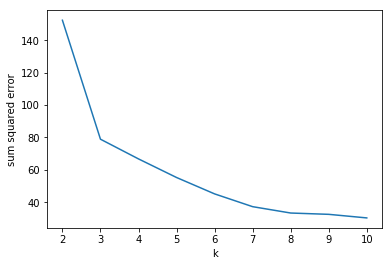

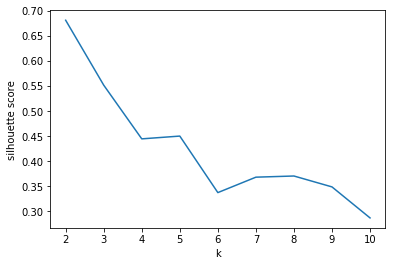

In [129]:
plot_k_sse(X, 2, 10, runs=3)
plot_k_silhouette(X, 2, 10, runs=3)

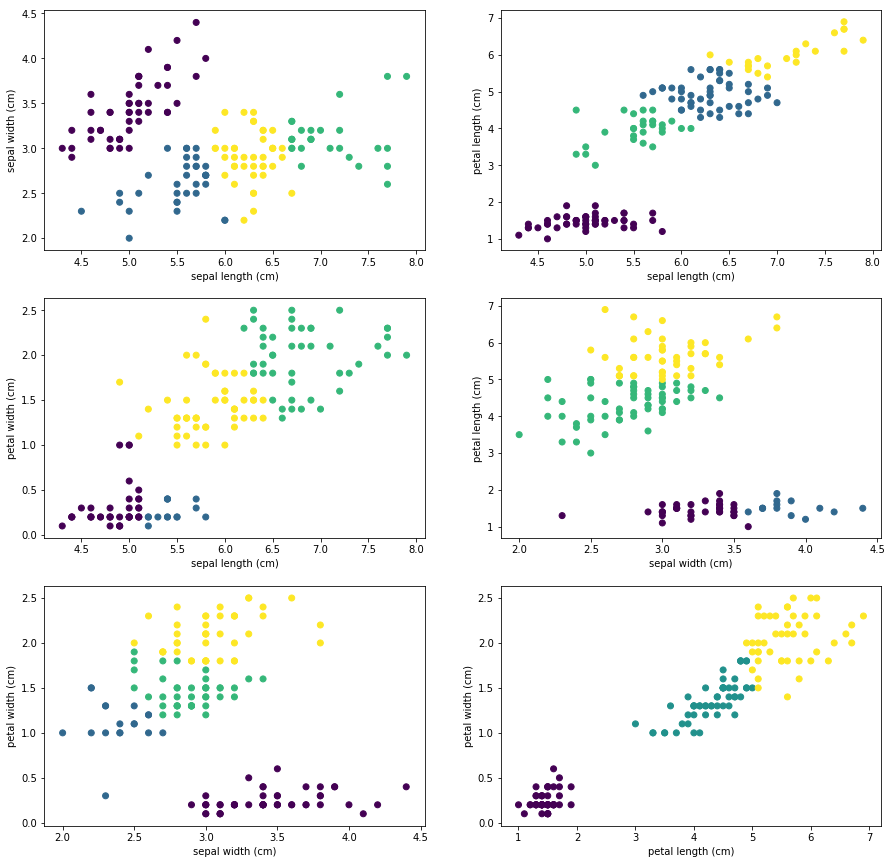

In [132]:
plot_all_2d(X, np.array(iris.feature_names), k=4)